In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
def make_connection_with_db():
    import mysql.connector
  
    connection_mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="market"
    )
    cursor = connection_mydb.cursor(dictionary=True)#dictionary=True result in dectionary
    return connection_mydb, cursor

In [39]:
def data_of_users():
    df = pd.DataFrame(columns=['user_id','country','age','gender'])

    _,curser=make_connection_with_db()
    query='select ID from wp_users'

    curser.execute(query)
    users_id=curser.fetchall()

    #print(users_id)
    
    for user in users_id:
        
        user_id=user['ID']
        query='select meta_value from wp_usermeta where user_id=(%s) and meta_key="country"'
        param=(user_id,)
        curser.execute(query,param)
        result=curser.fetchall()

        if result !=None and len(result)>0:
            country=result[0]['meta_value']
        else:
            country='Unknown'
        
        query='select meta_value from wp_usermeta where user_id=(%s) and meta_key="age"'
        param=(user_id,)
        curser.execute(query,param)
        result=curser.fetchall()

        if result !=None and len(result)>0:
            age=result[0]['meta_value']
        else:
            age='Unknown'
        

        query='select meta_value from wp_usermeta where user_id=(%s) and meta_key="gender"'
        param=(user_id,)
        curser.execute(query,param)
        result=curser.fetchall()

        if result !=None and len(result)>0:
            gender=result[0]['meta_value']
        else:
            gender='Unknown'

        obj_df={
            'user_id':user,
            'country':country,
            'age':age,
            'gender':gender
        }

        obj_df=pd.DataFrame(obj_df)
        df=pd.concat([df,obj_df])

        df.drop(df[df['country']=='Unknown'].index)
        df.drop(df[df['age']=='Unknown'].index)
        df.drop(df[df['gender']=='Unknown'].index)
        
        df['age']=pd.to_numeric(df['age'])
    return df

In [41]:
df_users=data_of_users()
df_users

,user_id,country,age,gender
ID,1501,JO,33,ذكر
ID,1784,JO,30,ذكر
ID,1109,AE,37,انثى
ID,112,BH,55,انثى
ID,1115,JO,29,ذكر
...,...,...,...,...
ID,892,AE,30,انثى
ID,91,SA,41,ذكر
ID,910,BH,44,انثى
ID,931,SA,48,انثى


In [46]:
def plot_hist():
    users_data=data_of_users()
    df_age=users_data['age']
    df_age.hist(bins=[10,20,30,40,50,60,70,80])
    plt.xlabel('Age')
    plt.ylabel("count")
    plt.title("Users Age Histogram")
    plt.show()

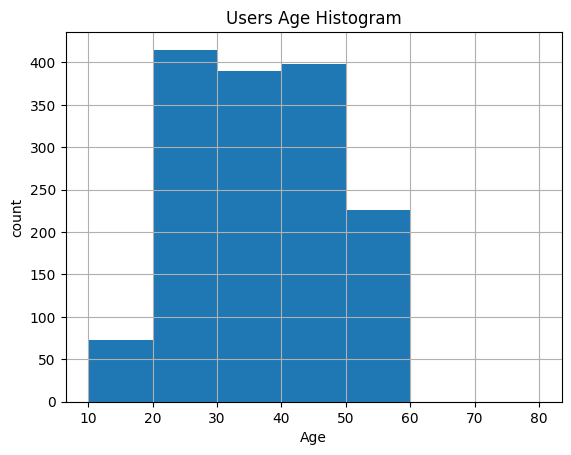

In [47]:
plot_hist()

In [48]:
def show_users_age_density():
    
    df_profile = data_of_users()
    
    df_age = df_profile['age']
    
    df_age.plot(kind='density')
    
    plt.xlabel("Age")
    
    plt.ylabel("Density")
    
    plt.title("Users Age Density")
    plt.show()

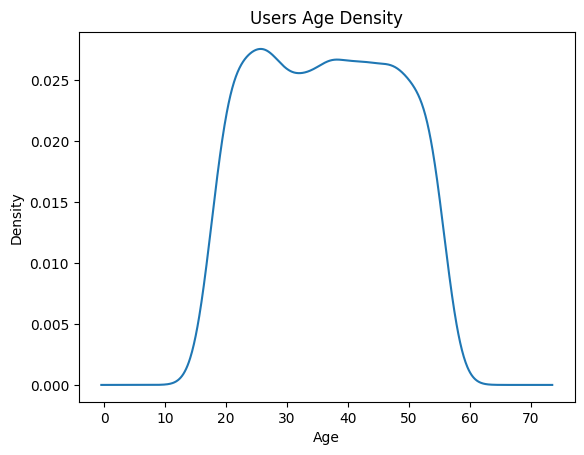

In [49]:
show_users_age_density()

In [50]:
def show_users_gender_pie():
    
    df_profile = data_of_users()
    
    df_gender = df_profile[['gender','user_id']].groupby('gender').count()
    print(df_gender)
    
    import arabic_reshaper
    from bidi.algorithm import get_display
    
    df_gender = df_gender.reset_index()
    print(df_gender)
    
    df_gender['gender'] = df_gender['gender'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))
    
    plt.pie(df_gender['user_id'], labels = df_gender['gender'], autopct='%1.1f%%')
    
    plt.title('Gender Pie')
    
    plt.show()

        user_id
gender         
انثى        784
ذكر         718
  gender  user_id
0   انثى      784
1    ذكر      718


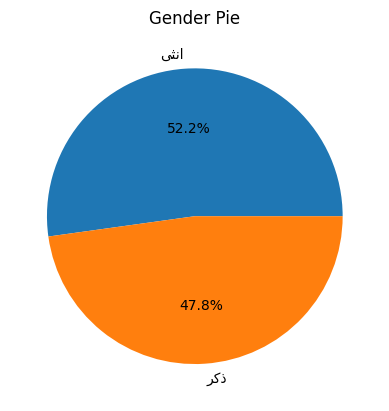

In [51]:
show_users_gender_pie()

In [54]:
import seaborn as sns
def show_users_gender_countplot():
    
    import arabic_reshaper
    from bidi.algorithm import get_display
    
    df_profile = data_of_users()
    
    plt.subplots(figsize=(8, 6))
    
    plt.title("Users Gender Count")
    
    df_profile['gender'] = df_profile['gender'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))
    
    ax = sns.countplot(x=df_profile['gender'])
    
    ax.bar_label(ax.containers[0])
    
    plt.show()

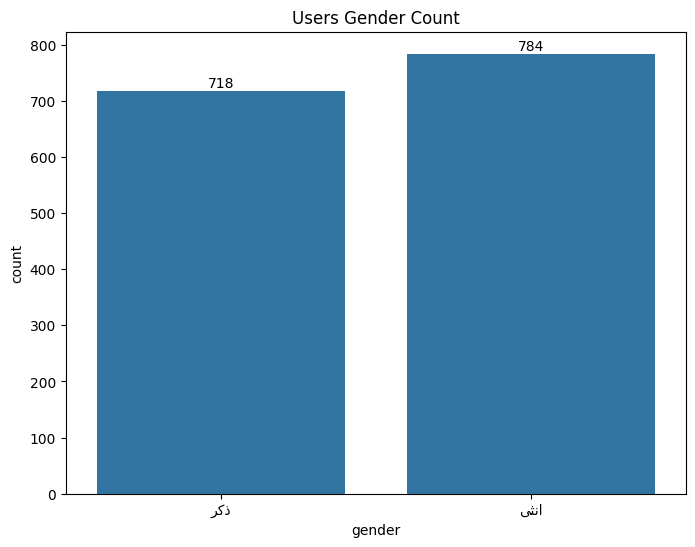

In [55]:
show_users_gender_countplot()